# Extended Data 5- Ye et al. 2023

In [1]:
import matplotlib.pyplot as plt
import glob
import os
import sys
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
import pandas as pd
import json
plt.rcParams['axes.labelsize'] = 17  # for x and y labels
plt.rcParams['xtick.labelsize'] = 17 # for x axis tick labels
plt.rcParams['ytick.labelsize'] = 17 # for y axis tick labels
plt.rcParams['axes.titlesize'] = 17

## Top-down SuperAnimal-TopViewMouse using HRNetw32 on DLC Openfield

/var/folders/n5/5_x4w2px2wn6hc6n_9zzlygw0000gn/T/ipykernel_42554/312400990.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_masked['method'] = df_masked['pretrain_model'] + '-' + df_masked['method']


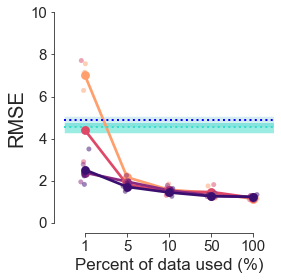

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_style("ticks")


rename_dict = {'from_scratch': 'HRNetw32 + ImageNet transfer learning',
               'zeroshot': 'SA + HRNetw32 + Zeroshot',
               'animaltokenpose_zeroshot' : 'SA + AnimalTokenPose + Zeroshot',
               'rand_head_transfer': 'HRNetw32 + SA + Randomly Initialized Decoder',          
               'memory_replay': 'HRNetw32 + SA + Memory Replay',
               'naive_finetune': 'HRNetw32 + SA + Naive Fine-tuning'}


df = pd.read_csv('../data/Figure1/hrnet_w32/dlc_openfield.csv')
df = df.iloc[:, 1:]


ATP_df = pd.read_csv('../data/Figure1/tokenpose_L/dlc_openfield.csv')

ATP_df = ATP_df.iloc[:, 1:]


df.columns = ['method', 'pretrain_model', 'training_ratio', 'shuffle', 'mAP',  'rmse']


ATP_df.columns = ['method', 'pretrain_model', 'training_ratio', 'shuffle', 'mAP',  'rmse']

superanimal_zeroshot_rmse = df[(df['method'] == 'zeroshot') &
                  (df['pretrain_model'] == 'SuperAnimal') &
                  (df['training_ratio'] == 1.0)]['rmse']


ATP_superanimal_zeroshot_rmse = ATP_df[(ATP_df['method'] == 'zeroshot') &
                  (ATP_df['pretrain_model'] == 'SuperAnimal') &
                  (ATP_df['training_ratio'] == 1.0)]['rmse']


df_masked = df[df['method']!='zeroshot']


df_masked['method'] = df_masked['pretrain_model'] + '-' + df_masked['method']


custom_order = ["ImageNet-transfer-learning",
                "SuperAnimal-transfer-learning",
                "SuperAnimal-memory-replay",
                "SuperAnimal-finetune"]  
                
df_masked.set_index('method', inplace=True)

df_masked = df_masked.loc[custom_order]

rename_dict = {'ImageNet-transfer-learning': 'HRNetw32 + ImageNet transfer learning',
               'SuperAnimal-zeroshot': 'SA + HRNetw32 + Zeroshot',              
               'SuperAnimal-transfer-learning': 'HRNetw32 + SA + Randomly Initialized Decoder',          
               'SuperAnimal-memory-replay': 'HRNetw32 + SA + Memory Replay',
               'SuperAnimal-finetune': 'HRNetw32 + SA + Naive Fine-tuning'}



df_masked.rename(index=rename_dict, inplace=True)

df_masked = df_masked.reset_index()

#print (df_masked)

# Remove the old 'pretrain_model' and 'method' columns
df_masked = df_masked.drop(['pretrain_model'], axis=1)

df_masked['training_ratio'] = (pd.to_numeric(df_masked['training_ratio']) * 100).astype(int)
fig, ax1 = plt.subplots(
    ncols=1,
    tight_layout=True,
    figsize=(4, 4),
    sharex=True,
    sharey=True,
)


hrnet_min = np.min(superanimal_zeroshot_rmse)
hrnet_max = np.max(superanimal_zeroshot_rmse)

atp_min = np.min(ATP_superanimal_zeroshot_rmse)
atp_max = np.max(ATP_superanimal_zeroshot_rmse)


ax1.axhline(superanimal_zeroshot_rmse.mean(), ls=':', lw=2, color = 'blue')

ax1.axhspan(hrnet_min, hrnet_max, facecolor='lightblue', alpha=0.5)


ax1.axhline(ATP_superanimal_zeroshot_rmse.mean(), ls=':', lw=2, color='#38DCCA')


ax1.axhspan(atp_min, atp_max, facecolor='#38DCCA', alpha=0.5)



pal = 'magma_r'
sns.pointplot(data=df_masked, x="training_ratio", y="rmse", ax=ax1, hue='method', palette=pal, errorbar=None)
sns.stripplot(data=df_masked, x="training_ratio", y="rmse", ax=ax1, hue='method', palette=pal, alpha = .5)

ax1.legend().remove()


# handles, labels = ax1.get_legend_handles_labels()

# fig.legend(
#     handles[:4],
#     labels[:4],
#     frameon=False,
#     ncol=1,
#     loc='upper right',
#     fontsize='medium',
#     bbox_to_anchor=(1.5, 0.99),
# )



ax1.set_xlabel('')

ax1.set_ylim(0, 10)
ax1.set_xlabel('Percent of data used (%)')


plt.ylabel("RMSE", fontsize=20)

ax1.tick_params(axis="both", which="major", labelsize=15)

sns.despine(
    left=False,
    right=True,
    bottom=False,
    top=True,
    trim=True,
    offset={"bottom": 10, "left": 10},
)

#fig.supxlabel('Ratio of training data', y=0.05, x=0.5125)
fig.savefig('topdown_dlc_openfield_complicate.png', dpi=800, bbox_inches='tight', pad_inches=0.05, transparent = True)

In [3]:

topview_iid_files = glob.glob('../data/Extended_Figure5/iid/*.png')

topview_iid_image_files = sorted(topview_iid_files)

topview_ood_files = glob.glob('../data/Extended_Figure5/ood/*.png')
topview_ood_image_files = sorted(topview_ood_files)


gt_train_json = '../data/Extended_Figure6/supertopview_train.json'
gt_test_json = '../data/Extended_Figure6/supertopview_test.json'

with open(gt_train_json, 'r') as f:
    train_obj = json.load(f)
    
with open(gt_test_json, 'r') as f:
    test_obj = json.load(f)
    
train_obj['images'] += test_obj['images']
train_obj['annotations'] += test_obj['annotations']
obj = train_obj
    
from collections import defaultdict


imagename2anno = defaultdict(list)
imageid2imagename = {}
for image in obj['images']:
    imageid2imagename[image['id']] = image['file_name'].split('/')[-1]
    
for anno in obj['annotations']:
    imagename = imageid2imagename[anno['image_id']]
    imagename2anno[imagename].append(anno)
    



## Load the raw images from the IID dataset:

In [4]:
import cv2
import numpy as np
import json

def plot_keypoints_and_bbox(image_file, json_file, kpt_thr=0.6, kpt_width=3, skeleton_width=1, keep_topk = None):
    # Read the JSON file for dataset information
    with open('../data/supertopview_dataset.json') as f:
        dataset_info = json.load(f)
        keypoint_info = dataset_info['dataset_info']['keypoint_info']
        skeleton_info = dataset_info['dataset_info']['skeleton_info']
                                        
    # Create a dictionary for keypoint names to IDs and colors
    kpt_name_2_id = {v['name']: v['id'] for k, v in keypoint_info.items()}
    kpt_colors = [v['color'] for k, v in keypoint_info.items()]
    
    kpt_colors = [
        [127, 0, 255], [109, 28, 254], [91, 56, 253], [71, 86, 251], 
        [53, 112, 248], [33, 139, 244], [15, 162, 239], [4, 185, 234], 
        [22, 203, 228], [42, 220, 220], [60, 233, 213], [80, 244, 204], 
        [98, 250, 195], [118, 254, 185], [136, 254, 175], [156, 250, 163], 
        [174, 244, 152], [194, 233, 139], [212, 220, 127], [232, 203, 113], 
        [250, 185, 100], [255, 162, 86], [255, 139, 72], [255, 112, 57], 
        [255, 86, 43], [255, 56, 28], [255, 28, 14]
    ]


    # Prepare color pairs for skeleton links
    n_kpts = 27
    pair_2_color = np.ones((n_kpts, n_kpts, 3), dtype=np.uint8) * 255  # Default to white
    for skeleton_id, skeleton in skeleton_info.items():
        if 'antler' in skeleton['link'][0] or 'antler' in skeleton['link'][1]:
            continue
        p1, p2 = kpt_name_2_id[skeleton['link'][0]], kpt_name_2_id[skeleton['link'][1]]
        
        color = skeleton['color']
        pair_2_color[p1][p2] = color
        pair_2_color[p2][p1] = color

    # Read keypoints and bbox from the provided JSON file
    with open(json_file, 'r') as f:
        obj = json.load(f)              
    
    confidences = []
    for pair in obj:        
        keypoints = np.array(pair['keypoints'])
        bbox = np.array(pair['bbox'])[:4]    
        confidence = np.array(pair['bbox'])[4]
        confidences.append(confidence)
        
    confidences = np.array(confidences)
    
    sorted_indices = np.argsort(confidences)[::-1]
    # Take the first two indices to get the indices of the two largest values
    if keep_topk:
        top_indices = sorted_indices[:keep_topk]

    img = cv2.imread(image_file)
    
    
    if keep_topk:
        obj = np.array(obj)
        obj = obj[top_indices]
   

    gt_annotations = imagename2anno[image_file.split('/')[-1]]
    
    
    for gt_anno in gt_annotations:
        keypoints = np.array(gt_anno['keypoints'])
        keypoints = keypoints.reshape(27, 3)
        for idx, kpt in enumerate(keypoints):
            cv2.drawMarker(img, (int(kpt[0]), int(kpt[1])), kpt_colors[idx][::-1], markerType=cv2.MARKER_CROSS, markerSize=kpt_width + 5)
    

    for pair in obj:

        keypoints = np.array(pair['keypoints'])
        bbox = np.array(pair['bbox'])[:4]

        # Draw bounding box
        cv2.rectangle(img, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (0, 255, 0), 2)

        # Draw keypoints
        for idx, kpt in enumerate(keypoints):
            if kpt[2] > kpt_thr:
                cv2.circle(img, (int(kpt[0]), int(kpt[1])), kpt_width, kpt_colors[idx][::-1], -1)
            else:
                text_size = 0.4  # Adjust text size as needed
                text_thickness = 1  # Adjust text thickness as needed
                cv2.putText(img, 'X', (int(kpt[0]), int(kpt[1])), cv2.FONT_HERSHEY_SIMPLEX, 
                    text_size, kpt_colors[idx][::-1], text_thickness, cv2.LINE_AA)

        # Draw skeleton
        for i in range(n_kpts):
            for j in range(n_kpts):
                if i != j and not np.all(pair_2_color[i][j] == 255):  # Check if the color is not default white
                    if keypoints[i][2] >= kpt_thr and keypoints[j][2] >= kpt_thr:
                        cv2.line(img, (int(keypoints[i][0]), int(keypoints[i][1])), 
                                 (int(keypoints[j][0]), int(keypoints[j][1])), 
                                 pair_2_color[i][j].tolist(), skeleton_width)

        # Save the result image
        title = 'pred_' + image_file.split('/')[-1]
        cv2.imwrite(title, img)
    return img

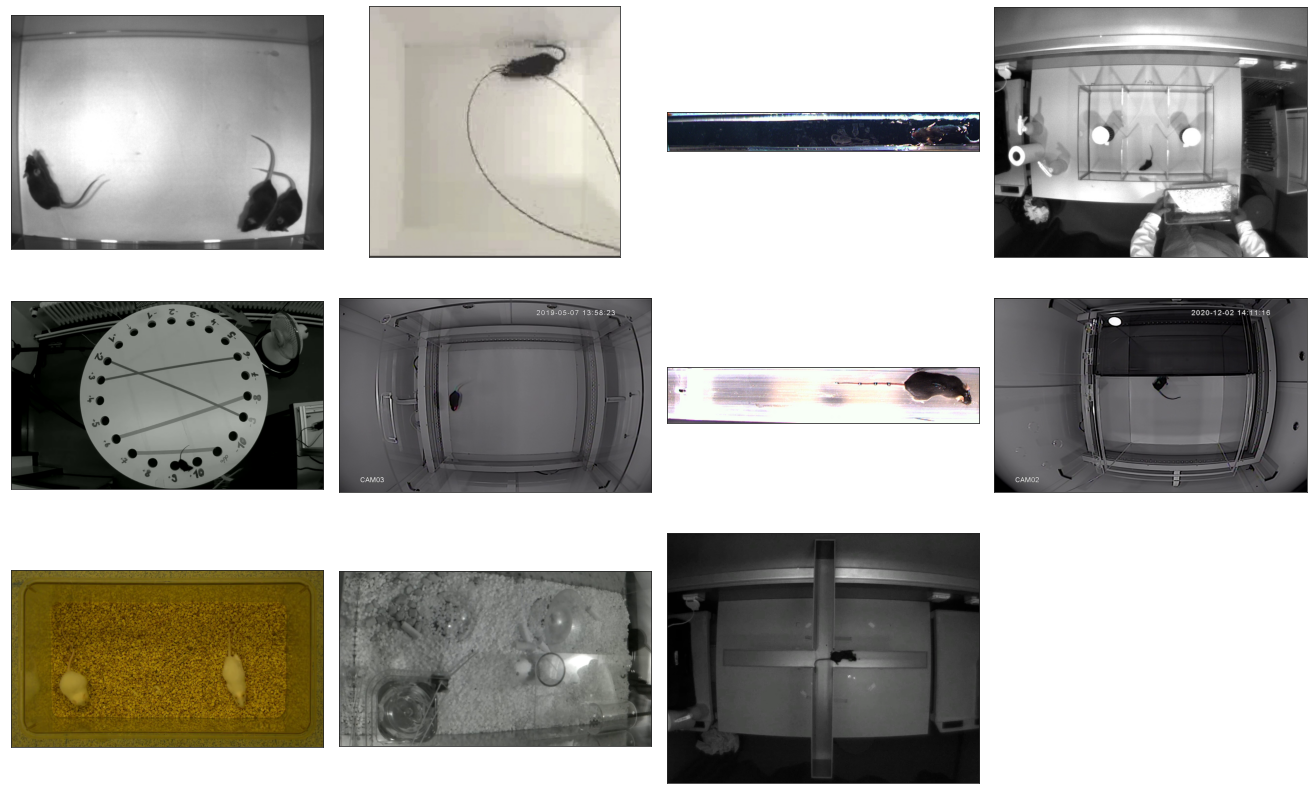

In [5]:
fig, axes = plt.subplots(3,4)

for idx in range(12):
    row = idx //4
    col = idx % 4
    
    if idx > 10:
        axes[row][col].axis('off')
        continue    
    
    file = topview_iid_files[idx]
    img =  mpimg.imread(file)    
    axes[row][col].imshow(img)
    axes[row][col].set_xticks([])
    axes[row][col].set_yticks([])                

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, wspace=0.05, hspace=0.05)
fig.set_size_inches(20, 12) 
plt.show()

## Plot the outputs of top-down SupeAnimal-TopViewMouse IID:

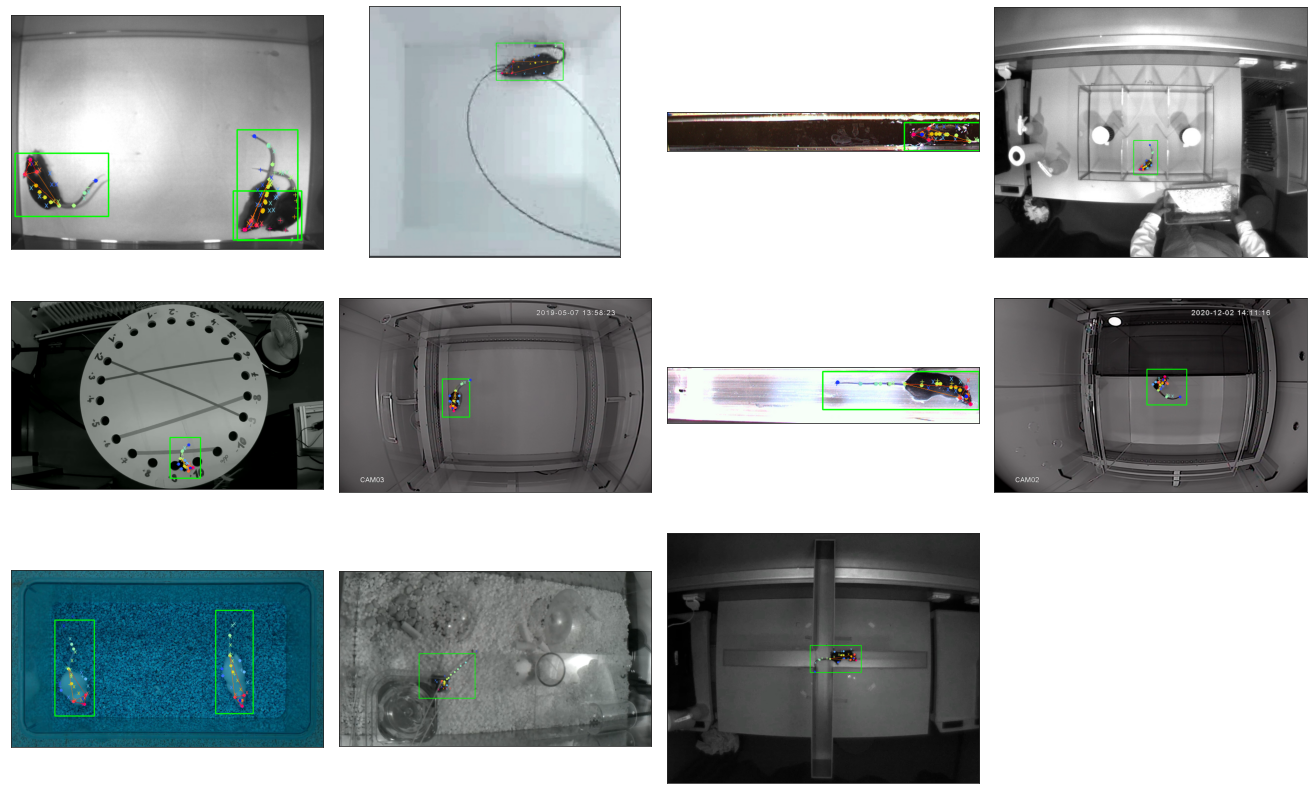

In [7]:
fig, axes = plt.subplots(3,4)

for idx in range(12):
    row = idx //4
    col = idx % 4
    
    if idx > 10:
        axes[row][col].axis('off')
        continue    
    
    image_file = topview_iid_files[idx]
    imagename = image_file.split('/')[-1]    
    json_file = image_file.replace(imagename, f'pred_result_{imagename}.json')
    img = plot_keypoints_and_bbox(image_file, json_file, kpt_thr=0.6, kpt_width=4, skeleton_width=1, keep_topk = None)
    
    axes[row][col].imshow(img)
    axes[row][col].set_xticks([])
    axes[row][col].set_yticks([])                

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, wspace=0.05, hspace=0.05)
fig.set_size_inches(20, 12) 
plt.show()

## Load the raw images from the OOD dataset:


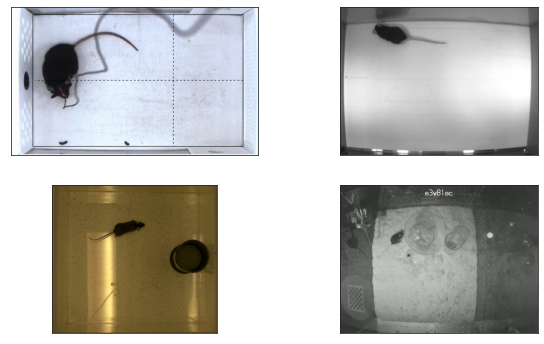

In [8]:
fig, axes = plt.subplots(2,2)

for idx in range(4):
    row = idx //2
    col = idx % 2
           
    
    file = topview_ood_files[idx]
    img =  mpimg.imread(file)    
    axes[row][col].imshow(img)
    axes[row][col].set_xticks([])
    axes[row][col].set_yticks([])                

fig.set_size_inches(10, 6) 
plt.show()

## Plot the outputs of top-down SupeAnimal-TopViewMouse IID:

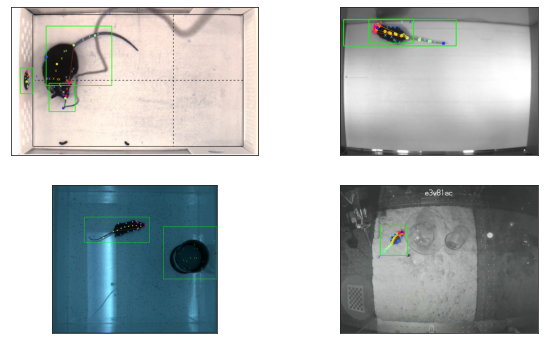

In [9]:
fig, axes = plt.subplots(2,2)

for idx in range(4):
    row = idx //2
    col = idx % 2
           
    
    image_file = topview_ood_files[idx]
    imagename = image_file.split('/')[-1]    
    json_file = image_file.replace(imagename, f'pred_result_{imagename}.json')
    img = plot_keypoints_and_bbox(image_file, json_file, kpt_thr=0.6, kpt_width=5, skeleton_width=1, keep_topk = 3)
    axes[row][col].imshow(img)
    axes[row][col].set_xticks([])
    axes[row][col].set_yticks([])                

fig.set_size_inches(10, 6) 
plt.show()